# Data Cleaning and EDA for [Auto Insurance Claims Data](https://www.kaggle.com/datasets/buntyshah/auto-insurance-claims-data)

In [14]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

import requests
from bs4 import BeautifulSoup

import warnings 
warnings.filterwarnings('ignore')

In [15]:
# Formatting
pd.set_option("display.max_columns", None)

# Path reference to make import statements concise
path = '/Users/samalainabayeva/Documents/Omdena/insurance_claims.csv'

In [17]:
# Loading the data

df = pd.read_csv(path, parse_dates=["incident_date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   object        
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

### Initial Observations:
The data are 1000 rows with 40 columns. **One feature column, "_c39", is entirely null**, and a **second column, authorities_contacted** also contains null values. All other columns seem to have valid entries for all 1000 rows of data.

In [18]:
# Visual Inspection
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [19]:
df["authorities_contacted"].value_counts(dropna=False)

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

<hr style="border: 3px solid blue">

# Data Dictionary : From [Kaggle Notebook](https://www.kaggle.com/code/vikramkaki/auto-insurance-claim)

| **Field Name**        | **Description**                                                                      |
|-----------------------|--------------------------------------------------------------------------------------|
| months_as_customer    | Number of months the customer has been with the insurance company.                  |
| age                   | Age of the insured person.                                                          |
| policy_number         | Unique identifier for the insurance policy.                                         |
| policy_bind_date      | Date when the insurance policy was initiated or bound.                               |
| policy_state          | State where the insurance policy is applicable.                                      |
| policy_csl            | Coverage limit and split format of the insurance policy (e.g., 250/500/1000).        |
| policy_deductable     | Deductible amount for the insurance policy.                                          |
| policy_annual_premium | Annual premium amount for the insurance policy.                                      |
| umbrella_limit        | Additional coverage limit beyond the regular policy.                                  |
| insured_zip           | ZIP code of the insured person.                                                     |
| insured_sex           | Gender of the insured person.                                                       |
| insured_education_level | Education level of the insured person.                                              |
| insured_occupation    | Occupation of the insured person.                                                   |
| insured_hobbies       | Hobbies of the insured person.                                                      |
| insured_relationship | Relationship of the insured person with the policyholder (e.g., spouse, child).      |
| capital-gains         | Amount of capital gains.                                                             |
| capital-loss          | Amount of capital losses.                                                            |
| incident_date         | Date when the incident occurred.                                                     |
| incident_type         | Type of incident (e.g., single vehicle collision, multi-vehicle collision, etc.).    |
| collision_type        | Type of collision (e.g., rear-end, side collision, etc.).                            |
| incident_severity     | Severity level of the incident (e.g., Minor Damage, Total Loss, etc.).               |
| authorities_contacted | Authorities contacted after the incident (e.g., Police, Fire, Ambulance, etc.).      |
| incident_state        | State where the incident occurred.                                                   |
| incident_city         | City where the incident occurred.                                                     |
| incident_location     | Specific location/address where the incident occurred.                                |
| incident_hour_of_the_day | Hour of the day when the incident occurred.                                         |
| number_of_vehicles_involved | Number of vehicles involved in the incident.                                       |
| property_damage       | Property damage indicator (Yes/No).                                                  |
| bodily_injuries       | Number of bodily injuries in the incident.                                           |
| witnesses             | Number of witnesses to the incident.                                                 |
| police_report_available | Indicator if a police report is available for the incident (Yes/No).                  |
| total_claim_amount    | Total claim amount for the incident.                                                 |
| injury_claim          | Claim amount for injuries in the incident.                                           |
| property_claim        | Claim amount for property damage in the incident.                                    |
| vehicle_claim         | Claim amount for vehicle damage in the incident.                                     |
| auto_make             | Make of the insured vehicle.                                                         |
| auto_model            | Model of the insured vehicle.                                                        |
| auto_year             | Year of manufacture of the insured vehicle.                                          |
| fraud_reported        | Indicator if fraud was reported for the incident (Yes/No).                            |
| _c39                  | (Note: Unclear field name or purpose, potentially irrelevant or placeholder data.)   |


<hr style="border: 3px solid blue">


### Fraud Detected
The original purpose of this data was to help insurance companies detect fraudulent claims. There are labels for fraudulent and non-fraudulent claims under the "fraud_reported" column. `I suggest that we omit the fraudulent claims from our final aggregated data set.`

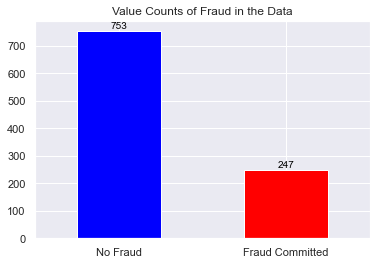

In [20]:
# Value Counts - plotted

sns.set()
ax = df["fraud_reported"].value_counts(dropna=False).\
rename({"N":"No Fraud", "Y":"Fraud Committed"}).plot(kind='bar', rot=0, color=["blue", "red"])
for bars in ax.patches:
    ax.annotate(text=f"{bars.get_height()}", xy=(bars.get_x() + (bars.get_width() / 2), bars.get_height()), 
                ha="center", va="center", xytext=(0,5), textcoords='offset points', fontsize=10, color="black")
ax.set_xlabel("")
ax.set_title("Value Counts of Fraud in the Data");

<hr style="border:3px solid blue">

### Imputing null values

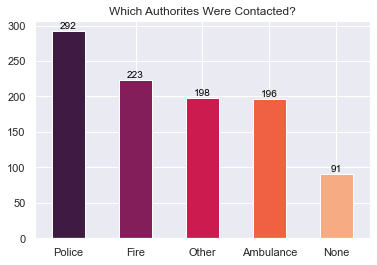

In [21]:
# Inspecting "authorities_contacted"
df["authorities_contacted"].value_counts(dropna=False)

ax = df["authorities_contacted"].value_counts(dropna=False).plot(kind='bar', rot=0, color=sns.color_palette("rocket", n_colors=5))
for bars in ax.patches:
    ax.annotate(text=f"{bars.get_height()}", xy=(bars.get_x() + (bars.get_width() / 2), bars.get_height()), 
                ha="center", va="center", xytext=(0,5), textcoords='offset points', fontsize=10, color="black")
ax.set_xlabel("")
ax.set_title("Which Authorites Were Contacted?");

### Handling Nulls

For these null values, **every claim that was filed was for 1 car.** The filer of the claim either had their car stolen, or had their parked car damaged. In either case, there was never evidence to report to an authority, and the victims' only recourse was to file insurance claims.  

In [22]:
# Inspecting the data where authorities are null and activity is not fraudulent -> 85 rows

df.loc[(df["authorities_contacted"].isna()) & (df["fraud_reported"] == "N"), "incident_type"].value_counts()

Series([], Name: incident_type, dtype: int64)

In [23]:
# All non-fraudulent claims were 1-car accidents
df.loc[(df["authorities_contacted"].isna()) & (df["fraud_reported"] == "N"), "number_of_vehicles_involved"].value_counts()

Series([], Name: number_of_vehicles_involved, dtype: int64)

<hr style="border:2px solid blue">

### Filling 26 / 85 missing values

In [24]:
# 26 / 85 missing values have a police report, so I think it would be reasonable to fill them as such
df.loc[(df["authorities_contacted"].isna()) & (df["fraud_reported"] == "N"), "police_report_available"].value_counts()

Series([], Name: police_report_available, dtype: int64)

In [25]:
# Filling the nulls for authorities contact that do have police reports available
df.loc[(df["authorities_contacted"].isna()) & 
       (df["fraud_reported"] == "N") & 
       (df["police_report_available"] == "YES"), "authorities_contacted"] = "Police"

In [26]:
# After filling the values
df.loc[(df["authorities_contacted"].isna()) & (df["fraud_reported"] == "N"), "police_report_available"].value_counts()

Series([], Name: police_report_available, dtype: int64)

<hr style="border:2px solid blue">


### Investigating other 1-Car accidents where "authorities_contacted" is NOT NULL

In [27]:
# 389 additional single-car claims that are not fraudulent

# Creating new df for conditional inspection
single_car_auth = df.query("number_of_vehicles_involved == 1 & fraud_reported == \
'N' & authorities_contacted.notna()")
single_car_auth["incident_type"].value_counts()

Single Vehicle Collision    286
Vehicle Theft                86
Parked Car                   76
Name: incident_type, dtype: int64

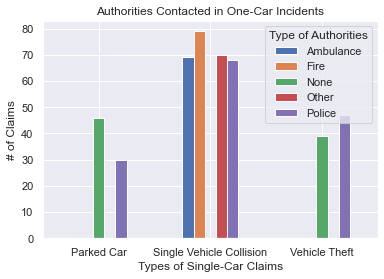

In [28]:
# Plotting the authorities that were called under certain specific scenarios for One-Car claims
single_car_auth.groupby("incident_type")["authorities_contacted"]\
.value_counts().unstack().plot(kind = "bar", title="Authorities Contacted in One-Car Incidents", rot=0, 
                               xlabel="Types of Single-Car Claims", ylabel="# of Claims")
legend = plt.legend()
legend.set_title("Type of Authorities");

### After some closer inspection, I believe we have two options for filling in this data:
- 1. We can fill the nulls as "Unknown"
or
- 2. We can add the nulls to the "Other" category, as there is not a clear definition of what "Other" includes


For the time being, I will fill the nulls with "Unknown". This is very similar to using a "missing-indicator", and the increase in feature-space is negligible relative to the size of our data, as many included features would already not be useful for modeling. 

In [29]:
# Filling the remaining null values
df["authorities_contacted"] = df["authorities_contacted"].fillna("Unknown")

# Confirmation that all null values are filled -> except the strange column _c39
print("Total Nulls Remaining in Data:", df.drop(columns="_c39").isna().sum().sum())

Total Nulls Remaining in Data: 0


<hr style="border: 3px solid blue">

<div class="alert alert-info alert-block"; style="background-color:blue; font-size:2em; color:white">
    <b>EDA: Null Values Filled, Exploring Relationships </b>
    </div>

Now that the data is cleaned and nulls are filled, I will explore some basic relationships between the data. For the purposes of this exploration, I will only deal with the legitimate (not fraud) claims, and I will drop the extraneous *_c39* column.

In [30]:
# Restricting the scope of our data to legitimate claims
df = df.drop(columns="_c39")
df = df.query("fraud_reported == 'N'")

In [31]:
# Summary of Numeric Features
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,753.000000,753.000000,753.000000,753.000000,753.00000,7.530000e+02,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000
mean,202.600266,38.884462,550571.297477,1130.810093,1258.43000,1.023904e+06,500419.537849,25432.005312,-26554.581673,11.626826,1.808765,0.976096,1.455511,50288.605578,7179.229748,7018.884462,36090.491368,2005.075697
std,113.574565,8.973139,257323.903505,606.771634,241.24721,2.225209e+06,72123.981953,27918.464555,28280.492080,6.976417,1.008252,0.816689,1.124415,27575.191379,4961.204029,4828.915463,19698.046058,6.001184
min,0.000000,20.000000,100804.000000,500.000000,433.33000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.000000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,1995.000000
25%,115.000000,32.000000,342830.000000,500.000000,1097.64000,0.000000e+00,446606.000000,0.000000,-51400.000000,6.000000,1.000000,0.000000,0.000000,34650.000000,3480.000000,3720.000000,25200.000000,2000.000000
50%,200.000000,38.000000,543610.000000,1000.000000,1253.12000,0.000000e+00,465674.000000,0.000000,-20400.000000,12.000000,1.000000,1.000000,1.000000,56520.000000,6620.000000,6560.000000,41220.000000,2005.000000
75%,276.000000,44.000000,771509.000000,2000.000000,1422.56000,0.000000e+00,603195.000000,51400.000000,0.000000,17.000000,3.000000,2.000000,2.000000,69480.000000,11120.000000,10600.000000,49980.000000,2010.000000
max,479.000000,64.000000,998865.000000,2000.000000,2047.59000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.000000,2.000000,3.000000,114920.000000,21450.000000,23670.000000,79560.000000,2015.000000


In [32]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
6,137,34,413978,2000-06-04,IN,250/500,1000,1333.35,0,441716,MALE,PhD,prof-specialty,board-games,husband,0,-77000,2015-01-13,Multi-vehicle Collision,Front Collision,Minor Damage,Police,NY,Springfield,5846 Weaver Drive,0,3,?,0,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N
7,165,37,429027,1990-02-03,IL,100/300,1000,1137.03,0,603195,MALE,Associate,tech-support,base-jumping,unmarried,0,0,2015-02-27,Multi-vehicle Collision,Front Collision,Total Loss,Police,VA,Columbus,3525 3rd Hwy,23,3,?,2,2,YES,51590,9380,9380,32830,Audi,A5,2015,N
8,27,33,485665,1997-02-05,IL,100/300,500,1442.99,0,601734,FEMALE,PhD,other-service,golf,own-child,0,0,2015-01-30,Single Vehicle Collision,Front Collision,Total Loss,Police,WV,Arlington,4872 Rock Ridge,21,1,NO,1,1,YES,27700,2770,2770,22160,Toyota,Camry,2012,N


In [33]:
quantiles = df["total_claim_amount"].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9]).to_list()
df["quantile"] = pd.cut(x=df["total_claim_amount"], bins=[-np.inf]+ quantiles +[np.inf],\
                        labels=["0-10%","10-20%", "20-30%", "30-40%", "40-50%", "50-60%", "60-70%", "70-80%", "80-90%", "90-100%"])

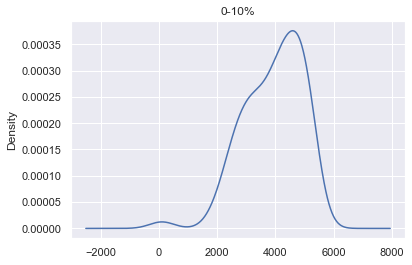

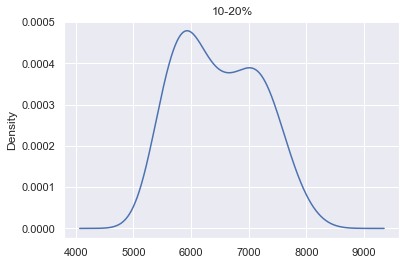

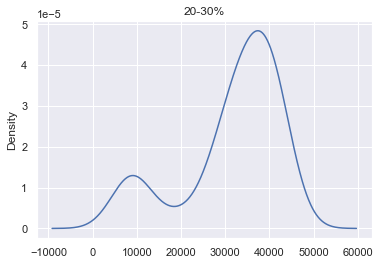

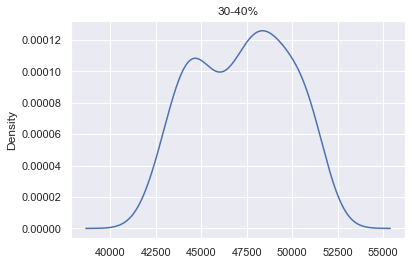

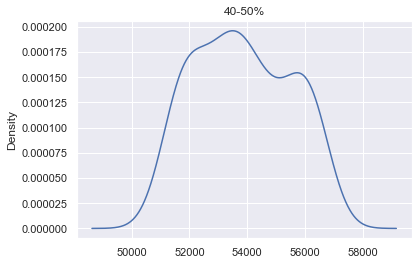

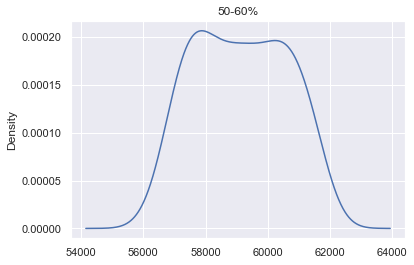

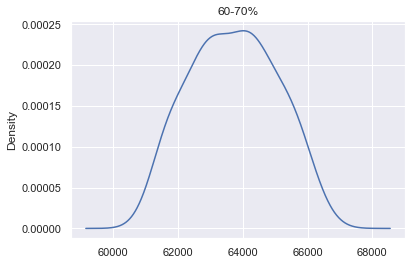

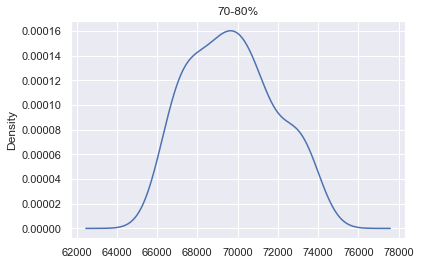

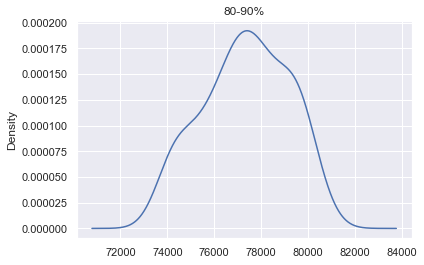

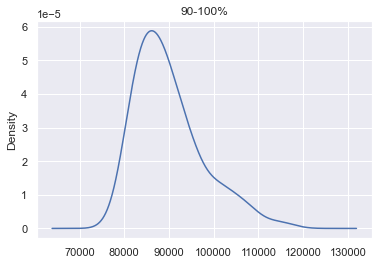

In [34]:
for name, group in df.groupby("quantile"):
    group[["total_claim_amount"]].plot(kind="kde", title=f"{name}", legend=False)
    plt.show()

In [35]:
df["quantile"].dtype

CategoricalDtype(categories=['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50-60%',
                  '60-70%', '70-80%', '80-90%', '90-100%'],
                 ordered=True)

In [36]:
df.select_dtypes(include=np.number)

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
2,134,29,687698,2000,1413.14,5000000,430632,35100,0,7,3,2,3,34650,7700,3850,23100,2007
4,228,44,367455,1000,1583.91,6000000,610706,66000,-46000,20,1,0,1,6500,1300,650,4550,2009
6,137,34,413978,1000,1333.35,0,441716,0,-77000,0,3,0,0,78650,21450,7150,50050,2012
7,165,37,429027,1000,1137.03,0,603195,0,0,23,3,2,2,51590,9380,9380,32830,2015
8,27,33,485665,500,1442.99,0,601734,0,0,21,1,1,1,27700,2770,2770,22160,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1000,1310.80,0,431289,0,0,20,1,0,1,87200,17440,8720,61040,2006
996,285,41,186934,1000,1436.79,0,608177,70900,0,23,1,2,3,108480,18080,18080,72320,2015
997,130,34,918516,500,1383.49,3000000,442797,35100,0,4,3,2,3,67500,7500,7500,52500,1996
998,458,62,533940,2000,1356.92,5000000,441714,0,0,2,1,0,1,46980,5220,5220,36540,1998


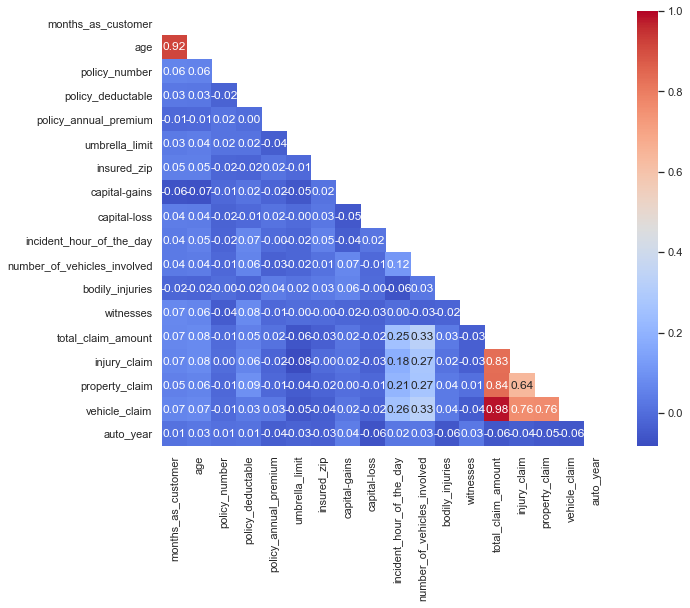

In [37]:
# Heatmap of the Numeric Features
sns.set_style("white")
fig, ax = plt.subplots(figsize=(10, 8))
mask = np.triu(np.ones_like(df.select_dtypes(include=np.number).corr(), dtype=bool))
sns.heatmap(data=df.select_dtypes(include=np.number).corr(), mask=mask, annot=True,\
            vmin=df.select_dtypes(include=np.number).corr().min().min(), 
            vmax=df.select_dtypes(include=np.number).corr().max().max(),
           cmap="coolwarm", ax=ax, cbar=True, fmt=".2f");

### Pairplot for visual inspection

In [ ]:
# # Pairplot
# mask = np.triu(np.ones_like(df.select_dtypes(exclude="object")))
# sns.pairplot(data=df.select_dtypes(exclude="object"), diag_kind="kde")

US vs Canada Data

Data must be from the US to avoid differences in cost and laws

Start with standard medical bills besides workers compensation, 
- medical codes
- procedures
- Where is this Data?
- How can we gain an understanding of the costs/codes/and source of data
- GitHub and Kaggle Data Sets
- Official US Websites 

### We will have to figure these things out ourselves!
##### Google Searches

- Look at research papers in the domain
- Consider all personal injuries NOT JUST CAR ACCIDENTS
- Data Scarcity is a concern

### Majority of the work is going to be wrangling data
- What do we want to extract from the data that we find, use domain research papers for guidance

- Vivek says simplify the problem where we have a US dataset, which are the types of injury with the maximum claims

In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
# Lots of Values to Clean Up in states
df["State of Injury"].value_counts().shape

In [ ]:
# Will likely have to use the codes to gain specific knowledge about the injuries
df["Type of Injury"].value_counts()

In [ ]:
df[df["AGE"] == df["AGE"].min()]

In [ ]:
df[df["Total Coverage"] == df["Total Coverage"].max()]

# Visualizing Numeric Distributions

In [ ]:
df[df["Net Attorney Fee"] < df["Net Attorney Fee"].quantile(.95)]["Net Attorney Fee"].hist(bins=np.arange(0, 4e4, 1000));

In [ ]:
df[df["Net Attorney Fee"] < df["Net Attorney Fee"].quantile(.95)]["Total Bills"].hist(bins=np.arange(0, 4e4, 1000));

In [ ]:
df[df["Net Attorney Fee"] < df["Net Attorney Fee"].quantile(.95)]["Total Coverage"].hist(bins=np.arange(0, 1e6, 50000));